In [ ]:
# LOADING REQUIRED LIBRARIES 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [4]:
# Loading Iris Dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [28]:
df=pd.read_csv(url,names=['sepal_length','sepal_width','petal_length','petal_width','target'])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
features=['sepal_length','sepal_width','petal_length','petal_width']
x=df.loc[:,features].values

In [10]:
y=df.loc[:, 'target'].values

In [13]:
x=StandardScaler().fit_transform(x)
pd.DataFrame(data=x,columns=features).head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [14]:
#PCA Projection to 2D 

In [15]:
pca=PCA(n_components=2)

In [16]:
Principal_Components=pca.fit_transform(x)

In [17]:
PrincipalDF=pd.DataFrame(data=Principal_Components,columns=['Pricipal_component_1','Pricipal_component_2'])

In [19]:
PrincipalDF.head(5)

,Pricipal_component_1,Pricipal_component_2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [22]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [23]:
finalDF=pd.concat([PrincipalDF,df[['target']]],axis=1)

In [24]:
finalDF.head()

,Pricipal_component_1,Pricipal_component_2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


In [25]:
# Visualize 2D Projection

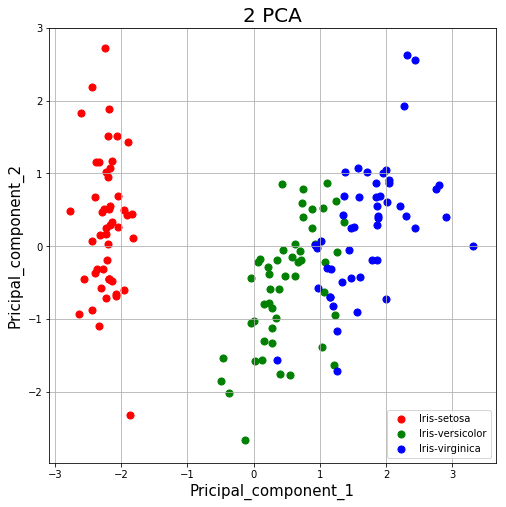

In [35]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Pricipal_component_1',fontsize=15)
ax.set_ylabel('Pricipal_component_2',fontsize=15)
ax.set_title('2 PCA',fontsize=20)

targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['r','g','b']

for target,color in zip(targets,colors):
    indices_to_keep=finalDF['target']==target
    ax.scatter(finalDF.loc[indices_to_keep,'Pricipal_component_1']
               ,finalDF.loc[indices_to_keep,'Pricipal_component_2']
               ,c=color
               ,s=50)
ax.legend(targets)
ax.grid()
               
    




In [38]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [ ]:
# Together, the first two principal components contain 95.80% of the information. 
# The first principal component contains 72.77% of the variance and the second principal component 
# contains 23.03% of the variance. 
# The third and fourth principal component contained the rest of the variance of the dataset.